<center><font size = "10"> Week 13 - Simplification <center>
<center><font size = "8">Home Work <center>

<font size = "3">Please, write your group number and the names and surnames of the group members here
<br>Group number: 3
<br>Group member 1: Laura TESTA
<br>Group member 2: Alice ALBRECHT
<br>Group member 3: Clara LE DRAOULEC
    
__IMPORTANT:__<font size = "3"> Exercises in <font color='red'>red</font> are mandatory assignments to be delivered by next Monday before 23:59.

# Ex1. Building an Integrate-And-Fire (IF) Neuron Model 

<font size='3'>Build and Integrate-And-Fire (IF) neuron model similar to how its done in Tutorial 1, with 10 ms membrane constat, 4 ms refactory period, 10 presynaptic stimuli, 3 ms apart on average and noise of 0.3. Plot your results and describe your observations.

OPTIONAL

# Ex2. Concepts - Integrate-And-Fire (IF) Neuron Model

<font size='3'>Explain what is an Integrate-And-Fire (IF) neuron model.
    
<font size='3'>What are the pros and cons of this model - in what situation would this model be useful ? Which aspects of neuronal dynamics does it neglect ?

<font size='3'>Find in the literature a couple of examples that use this type of model and explain how did the authors use the IF neuron model for their research. [2 pts]

#### What is a Fire-And-Integrate model?

The Integrate-And-Fire model is a neuron model in which the action potentials are described as "events" happening at a specific time. The idea behind it is that the action potential of a neuron always has the same form (depolarization - threhsold - peak of potential - repolarization). Therefore, scientists concluded that the information may not be transmitted by the form of the action potential, but more by the frequency, number and timing of the action potentials. Therefore those model do not use any AP shape information. It has two components: one equation that describes the evolution of the membrane potential and another component to describe the generation of the spiking events [1]

[1] Gerstner, Wulfram. "1.3 Integrate-And-Fire Models | Neuronal Dynamics online book." 17 Dec. 2018, neuronaldynamics.epfl.ch/online/Ch1.S3.html.

#### What are the pros and cons of this model - in what situation would this model be useful ? Which aspects of neuronal dynamics does it neglect ?


There are many advantages in this model. For exmaple, the simplicity. Indeed, in this model a big assumption is made: the fact that all action potentials have a same shape, decreasing a lot the complexity of the model. Moreover, the efficiency of the model is still very interesting and above many other more complex neuron models such as the VSSN simulator, allowing to get analytical solutions when simulating very large networks with billions of connections [2].

The simplicity of the model is a strength but can also be a limitation in some cases. For example, in the model each spike is defined as an event and all events are the same. Thus, the mechanism of adaptation, which is a process that builds up over several spikes, isn't considered in the model [3]. Adaptation is one of the mechanisms that cannot be modeled by the Integrate-And-Fire model.



Despite the limitations, this model is very useful when modellning large networks. In order te get some results when considering very large networks, one has to do simplifications.

The main aspect of the neuronal dynamic that is neglected is the shape of the action potential and the spatial structure of the neuron associated with the dendrite. Instead, the potential of the membrane is modelized, integrating all the action potentials.




[2] Plesser, Hans E. and Markus Diesmann. "Simplicity and Efficiency of Integrate-and-Fire Neuron Models." Neural Comput., vol. 21, no. 2, 1 Feb. 2009, pp. 353-9, doi:10.1162/neco.2008.03-08-731.

[3] Gerstner, Wulfram. "1.4 Limitations of the Leaky Integrate-and-Fire Model | Neuronal Dynamics online book." 2 Apr. 2020, neuronaldynamics.epfl.ch/online/Ch1.S4.html.

#### Find in the literature a couple of examples that use this type of model and explain how did the authors use the IF neuron model for their research.

##### First study:
Churilov, Alexander N., et al. "An integrate-and-fire model for pulsatility in the neuroendocrine system." Chaos, vol. 30, no. 8, Aug. 2020, p. 083132., doi:10.1063/5.0010553.

In this study, they use the Integrate-And-Fire model to model impulsive neural inputs coming form the hypothalamus; namely, inputs are generated only when the membrane potential crosses a threshold, after which it is reset to baseline. This model is combined with Goodwin-type feedback control with the ultime aim of modelling the pulsatility in neuroendocrine regulation. The final model has continuous and impulsive components.

##### Second study:
Rashvand, Parvaneh, et al. "Design and Implementation of a Spiking Neural Network with Integrate-and-Fire Neuron Model for Pattern Recognition." Int. J. Neural Syst., vol. 31, no. 3, Mar. 2021, p. 2050073., doi:10.1142/S0129065720500732.

This study uses the Integrate-And-Fire model for pattern recognition. They integrate the IF model into a SNN (spiking neural netowrk).


# Ex3. Point Neuron: non periodic firing behavior

<font size='3'>Create one artificial simplified IF point neuron that responds to excitatory and inhibitory stimulations, similar to the one in tutorial 01 (IntFire4). Play with the parameters of the neuron (taum, taui1, taui2 and taue) by increasing and decreasing them, show the results by plotting (Vm, I, E,+input, -input and output) and explain what is the role of each parameter using the plots. [2 pts]


In [1]:
from neuron import h
import matplotlib.pyplot as plt
import math as m

# Load external files & initialize
h.load_file("stdrun.hoc");
soma = h.Section() # dummy section so h._ref_t works

--No graphics will be displayed.


### Effect of Taum

In [2]:
# IntFire4 artificial cell

# change taum
if4 = h.IntFire4()
if4.taum = 5 # membrane time constant
if4.taui1 = 8 # inhibitory current time constant 1
if4.taui2 = 10 # inhibitory current time constant 2
if4.taue = 5 # excitatory current time constant


# Stimulators
s4a = h.NetStim()
s4a.interval = 5 # inter-spike interval
s4a.number = 100 # number of spikes
s4a.start = 5 # periodic

s4b = h.NetStim()
s4b.interval = 25 # inter-spike interval
s4b.number = 10 # number of spikes
s4b.start = 8 # periodic

# connect stimulators to IF2 cell
nc4a = h.NetCon(s4a, if4)
nc4a.weight[0] = 0.5 # weight of each event
# store input spike times
nc4a_v = h.Vector()
nc4a.record(nc4a_v)

nc4b = h.NetCon(s4b, if4)
nc4b.weight[0] = -0.5 # weight of each event (negative -> inhibitory)
# store input spike times
nc4b_v = h.Vector()
nc4b.record(nc4b_v)

# store output spike (event) times
ev4 = h.NetCon(if4, None)
ev4_v = h.Vector()
ev4.record(ev4_v)

# record time
time_v = h.Vector()
time_v.record(h._ref_t)


Vector[3]

In [3]:
# initialize
h.stdinit()
h.finitialize(-65)

# record M, E and I functions
vm4_v = h.Vector()
im4_v = h.Vector()
em4_v = h.Vector()
vm4_v.append(if4.M())
im4_v.append(if4.I())
em4_v.append(if4.E())

tstop = 200 # final time
nstep = m.ceil(tstop / h.dt) # number of time steps
for i in range(0,nstep):
    h.fadvance() # advance time step
    vm4_v.append(if4.M()) # record M function
    im4_v.append(if4.I()) # record I function
    em4_v.append(if4.E()) # record E function

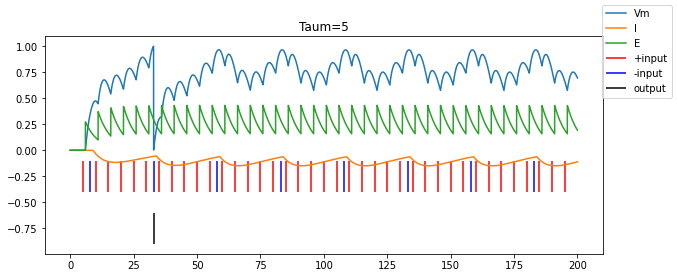

In [4]:
# plot membrane voltage and current
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(time_v,vm4_v,label='Vm')
ax.plot(time_v,im4_v,label='I')
ax.plot(time_v,em4_v,label='E')
ax.vlines(nc4a_v, ymin=-0.4, ymax=-0.1, color='red', label='+input')
ax.vlines(nc4b_v, ymin=-0.4, ymax=-0.1, color='blue', label='-input')
if len(ev4_v) > 0:
    ax.vlines(ev4_v, ymin=-0.9, ymax=-0.6, color='black', label='output')
plt.title('Taum=5')
fig.legend()

In [5]:
# IntFire4 artificial cell

# change taum
if4 = h.IntFire4()
if4.taum = 12 # membrane time constant
if4.taui1 = 8 # inhibitory current time constant 1
if4.taui2 = 10 # inhibitory current time constant 2
if4.taue = 5 # excitatory current time constant


# Stimulators
s4a = h.NetStim()
s4a.interval = 5 # inter-spike interval
s4a.number = 100 # number of spikes
s4a.start = 5 # periodic

s4b = h.NetStim()
s4b.interval = 25 # inter-spike interval
s4b.number = 10 # number of spikes
s4b.start = 8 # periodic

# connect stimulators to IF2 cell
nc4a = h.NetCon(s4a, if4)
nc4a.weight[0] = 0.5 # weight of each event
# store input spike times
nc4a_v = h.Vector()
nc4a.record(nc4a_v)

nc4b = h.NetCon(s4b, if4)
nc4b.weight[0] = -0.5 # weight of each event (negative -> inhibitory)
# store input spike times
nc4b_v = h.Vector()
nc4b.record(nc4b_v)

# store output spike (event) times
ev4 = h.NetCon(if4, None)
ev4_v = h.Vector()
ev4.record(ev4_v)

# record time
time_v = h.Vector()
time_v.record(h._ref_t)


Vector[10]

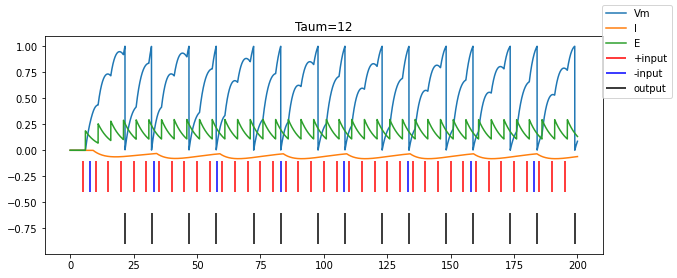

In [6]:
# initialize
h.stdinit()
h.finitialize(-65)

# record M, E and I functions
vm4_v = h.Vector()
im4_v = h.Vector()
em4_v = h.Vector()
vm4_v.append(if4.M())
im4_v.append(if4.I())
em4_v.append(if4.E())

tstop = 200 # final time
nstep = m.ceil(tstop / h.dt) # number of time steps
for i in range(0,nstep):
    h.fadvance() # advance time step
    vm4_v.append(if4.M()) # record M function
    im4_v.append(if4.I()) # record I function
    em4_v.append(if4.E()) # record E function
    
# plot membrane voltage and current
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(time_v,vm4_v,label='Vm')
ax.plot(time_v,im4_v,label='I')
ax.plot(time_v,em4_v,label='E')
ax.vlines(nc4a_v, ymin=-0.4, ymax=-0.1, color='red', label='+input')
ax.vlines(nc4b_v, ymin=-0.4, ymax=-0.1, color='blue', label='-input')
if len(ev4_v) > 0:
    ax.vlines(ev4_v, ymin=-0.9, ymax=-0.6, color='black', label='output')
plt.title('Taum=12')
fig.legend()

The membrane time constant is the time constant for the membrane to repolarize after a current injection.
If we compare the plots when decreasing and increasing the time constant of the membrane we observe that it has an effect on the membrane potential. Indeed, if we decrease it, we observe that it takes more time for the membrane to repolarize. Thus, it will result in less spikes. In the opposite, if we increase the time constant the number of spikes increases because the membrane potential recovers and repolarizes much faster.

### Effect of Taui1

In [7]:
# IntFire4 artificial cell

# change taum
if4 = h.IntFire4()
if4.taum = 8 # membrane time constant
if4.taui1 = 5 # inhibitory current time constant 1
if4.taui2 = 10 # inhibitory current time constant 2
if4.taue = 5 # excitatory current time constant


# Stimulators
s4a = h.NetStim()
s4a.interval = 5 # inter-spike interval
s4a.number = 100 # number of spikes
s4a.start = 5 # periodic

s4b = h.NetStim()
s4b.interval = 25 # inter-spike interval
s4b.number = 10 # number of spikes
s4b.start = 8 # periodic

# connect stimulators to IF2 cell
nc4a = h.NetCon(s4a, if4)
nc4a.weight[0] = 0.5 # weight of each event
# store input spike times
nc4a_v = h.Vector()
nc4a.record(nc4a_v)

nc4b = h.NetCon(s4b, if4)
nc4b.weight[0] = -0.5 # weight of each event (negative -> inhibitory)
# store input spike times
nc4b_v = h.Vector()
nc4b.record(nc4b_v)

# store output spike (event) times
ev4 = h.NetCon(if4, None)
ev4_v = h.Vector()
ev4.record(ev4_v)

# record time
time_v = h.Vector()
time_v.record(h._ref_t)


Vector[17]

In [8]:
# initialize
h.stdinit()
h.finitialize(-65)

# record M, E and I functions
vm4_v = h.Vector()
im4_v = h.Vector()
em4_v = h.Vector()
vm4_v.append(if4.M())
im4_v.append(if4.I())
em4_v.append(if4.E())

tstop = 200 # final time
nstep = m.ceil(tstop / h.dt) # number of time steps
for i in range(0,nstep):
    h.fadvance() # advance time step
    vm4_v.append(if4.M()) # record M function
    im4_v.append(if4.I()) # record I function
    em4_v.append(if4.E()) # record E function

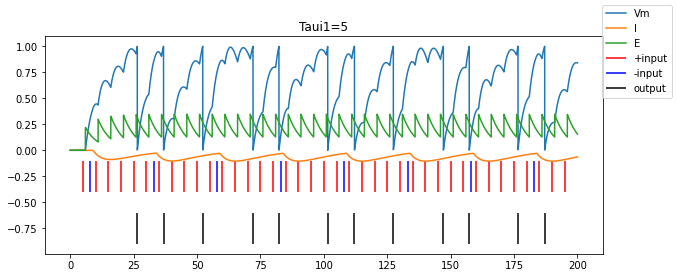

In [9]:
# plot membrane voltage and current
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(time_v,vm4_v,label='Vm')
ax.plot(time_v,im4_v,label='I')
ax.plot(time_v,em4_v,label='E')
ax.vlines(nc4a_v, ymin=-0.4, ymax=-0.1, color='red', label='+input')
ax.vlines(nc4b_v, ymin=-0.4, ymax=-0.1, color='blue', label='-input')
if len(ev4_v) > 0:
    ax.vlines(ev4_v, ymin=-0.9, ymax=-0.6, color='black', label='output')
plt.title('Taui1=5')
fig.legend()

In [10]:
# IntFire4 artificial cell

# change taum
if4 = h.IntFire4()
if4.taum = 8 # membrane time constant
if4.taui1 = 12 # inhibitory current time constant 1
if4.taui2 = 10 # inhibitory current time constant 2
if4.taue = 5 # excitatory current time constant


# Stimulators
s4a = h.NetStim()
s4a.interval = 5 # inter-spike interval
s4a.number = 100 # number of spikes
s4a.start = 5 # periodic

s4b = h.NetStim()
s4b.interval = 25 # inter-spike interval
s4b.number = 10 # number of spikes
s4b.start = 8 # periodic

# connect stimulators to IF2 cell
nc4a = h.NetCon(s4a, if4)
nc4a.weight[0] = 0.5 # weight of each event
# store input spike times
nc4a_v = h.Vector()
nc4a.record(nc4a_v)

nc4b = h.NetCon(s4b, if4)
nc4b.weight[0] = -0.5 # weight of each event (negative -> inhibitory)
# store input spike times
nc4b_v = h.Vector()
nc4b.record(nc4b_v)

# store output spike (event) times
ev4 = h.NetCon(if4, None)
ev4_v = h.Vector()
ev4.record(ev4_v)

# record time
time_v = h.Vector()
time_v.record(h._ref_t)


Vector[24]

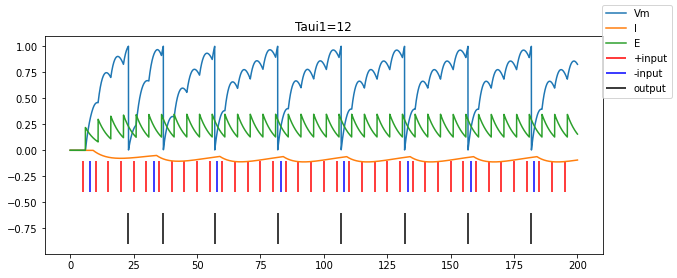

In [11]:
# initialize
h.stdinit()
h.finitialize(-65)

# record M, E and I functions
vm4_v = h.Vector()
im4_v = h.Vector()
em4_v = h.Vector()
vm4_v.append(if4.M())
im4_v.append(if4.I())
em4_v.append(if4.E())

tstop = 200 # final time
nstep = m.ceil(tstop / h.dt) # number of time steps
for i in range(0,nstep):
    h.fadvance() # advance time step
    vm4_v.append(if4.M()) # record M function
    im4_v.append(if4.I()) # record I function
    em4_v.append(if4.E()) # record E function
    
# plot membrane voltage and current
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(time_v,vm4_v,label='Vm')
ax.plot(time_v,im4_v,label='I')
ax.plot(time_v,em4_v,label='E')
ax.vlines(nc4a_v, ymin=-0.4, ymax=-0.1, color='red', label='+input')
ax.vlines(nc4b_v, ymin=-0.4, ymax=-0.1, color='blue', label='-input')
if len(ev4_v) > 0:
    ax.vlines(ev4_v, ymin=-0.9, ymax=-0.6, color='black', label='output')
plt.title('Taui1=12')
fig.legend()

The inhibitory time constant also has an effect on the membrane potential, and thus on the spiking (output). Increasing the time constant will decrease the amount of spikes because it will decrease the rate of repolarization. Indeed, increasing the inhibitroy time constant increases the inhibition and thus decreases the excitatory activity. In the contrary, decreasing the inhibitory time constant will increase the number of spikes.

### Effect of Taui2

In [12]:
# IntFire4 artificial cell

# change taum
if4 = h.IntFire4()
if4.taum = 8 # membrane time constant
if4.taui1 = 8 # inhibitory current time constant 1
if4.taui2 = 6 # inhibitory current time constant 2
if4.taue = 5 # excitatory current time constant


# Stimulators
s4a = h.NetStim()
s4a.interval = 5 # inter-spike interval
s4a.number = 100 # number of spikes
s4a.start = 5 # periodic

s4b = h.NetStim()
s4b.interval = 25 # inter-spike interval
s4b.number = 10 # number of spikes
s4b.start = 8 # periodic

# connect stimulators to IF2 cell
nc4a = h.NetCon(s4a, if4)
nc4a.weight[0] = 0.5 # weight of each event
# store input spike times
nc4a_v = h.Vector()
nc4a.record(nc4a_v)

nc4b = h.NetCon(s4b, if4)
nc4b.weight[0] = -0.5 # weight of each event (negative -> inhibitory)
# store input spike times
nc4b_v = h.Vector()
nc4b.record(nc4b_v)

# store output spike (event) times
ev4 = h.NetCon(if4, None)
ev4_v = h.Vector()
ev4.record(ev4_v)

# record time
time_v = h.Vector()
time_v.record(h._ref_t)


Vector[31]

In [13]:
# initialize
h.stdinit()
h.finitialize(-65)

# record M, E and I functions
vm4_v = h.Vector()
im4_v = h.Vector()
em4_v = h.Vector()
vm4_v.append(if4.M())
im4_v.append(if4.I())
em4_v.append(if4.E())

tstop = 200 # final time
nstep = m.ceil(tstop / h.dt) # number of time steps
for i in range(0,nstep):
    h.fadvance() # advance time step
    vm4_v.append(if4.M()) # record M function
    im4_v.append(if4.I()) # record I function
    em4_v.append(if4.E()) # record E function

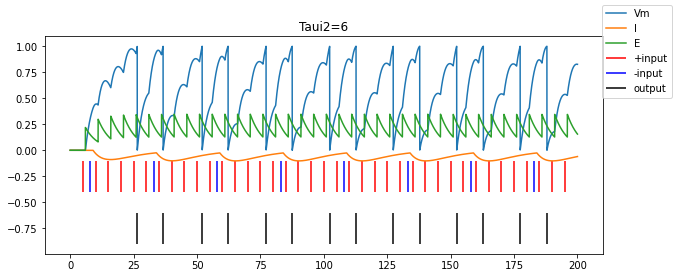

In [14]:
# plot membrane voltage and current
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(time_v,vm4_v,label='Vm')
ax.plot(time_v,im4_v,label='I')
ax.plot(time_v,em4_v,label='E')
ax.vlines(nc4a_v, ymin=-0.4, ymax=-0.1, color='red', label='+input')
ax.vlines(nc4b_v, ymin=-0.4, ymax=-0.1, color='blue', label='-input')
if len(ev4_v) > 0:
    ax.vlines(ev4_v, ymin=-0.9, ymax=-0.6, color='black', label='output')
plt.title('Taui2=6')
fig.legend()

In [15]:
# IntFire4 artificial cell

# change taum
if4 = h.IntFire4()
if4.taum = 8 # membrane time constant
if4.taui1 = 8 # inhibitory current time constant 1
if4.taui2 = 15 # inhibitory current time constant 2
if4.taue = 5 # excitatory current time constant


# Stimulators
s4a = h.NetStim()
s4a.interval = 5 # inter-spike interval
s4a.number = 100 # number of spikes
s4a.start = 5 # periodic

s4b = h.NetStim()
s4b.interval = 25 # inter-spike interval
s4b.number = 10 # number of spikes
s4b.start = 8 # periodic

# connect stimulators to IF2 cell
nc4a = h.NetCon(s4a, if4)
nc4a.weight[0] = 0.5 # weight of each event
# store input spike times
nc4a_v = h.Vector()
nc4a.record(nc4a_v)

nc4b = h.NetCon(s4b, if4)
nc4b.weight[0] = -0.5 # weight of each event (negative -> inhibitory)
# store input spike times
nc4b_v = h.Vector()
nc4b.record(nc4b_v)

# store output spike (event) times
ev4 = h.NetCon(if4, None)
ev4_v = h.Vector()
ev4.record(ev4_v)

# record time
time_v = h.Vector()
time_v.record(h._ref_t)


Vector[38]

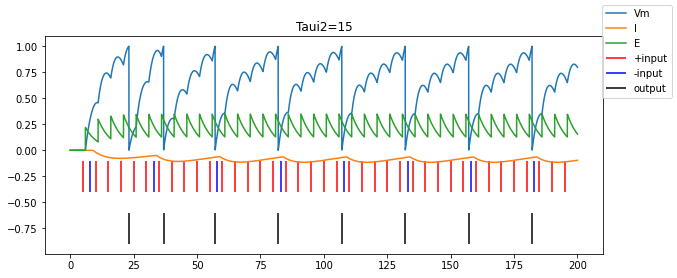

In [16]:
# initialize
h.stdinit()
h.finitialize(-65)

# record M, E and I functions
vm4_v = h.Vector()
im4_v = h.Vector()
em4_v = h.Vector()
vm4_v.append(if4.M())
im4_v.append(if4.I())
em4_v.append(if4.E())

tstop = 200 # final time
nstep = m.ceil(tstop / h.dt) # number of time steps
for i in range(0,nstep):
    h.fadvance() # advance time step
    vm4_v.append(if4.M()) # record M function
    im4_v.append(if4.I()) # record I function
    em4_v.append(if4.E()) # record E function
    
# plot membrane voltage and current
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(time_v,vm4_v,label='Vm')
ax.plot(time_v,im4_v,label='I')
ax.plot(time_v,em4_v,label='E')
ax.vlines(nc4a_v, ymin=-0.4, ymax=-0.1, color='red', label='+input')
ax.vlines(nc4b_v, ymin=-0.4, ymax=-0.1, color='blue', label='-input')
if len(ev4_v) > 0:
    ax.vlines(ev4_v, ymin=-0.9, ymax=-0.6, color='black', label='output')
plt.title('Taui2=15')
fig.legend()

The time constant taui2 has a similar effect than taui1, thus the same conclusions can be drawn.

### Effect of Taue

In [17]:
# IntFire4 artificial cell

# change taum
if4 = h.IntFire4()
if4.taum = 8 # membrane time constant
if4.taui1 = 8 # inhibitory current time constant 1
if4.taui2 = 10 # inhibitory current time constant 2
if4.taue = 3 # excitatory current time constant


# Stimulators
s4a = h.NetStim()
s4a.interval = 5 # inter-spike interval
s4a.number = 100 # number of spikes
s4a.start = 5 # periodic

s4b = h.NetStim()
s4b.interval = 25 # inter-spike interval
s4b.number = 10 # number of spikes
s4b.start = 8 # periodic

# connect stimulators to IF2 cell
nc4a = h.NetCon(s4a, if4)
nc4a.weight[0] = 0.5 # weight of each event
# store input spike times
nc4a_v = h.Vector()
nc4a.record(nc4a_v)

nc4b = h.NetCon(s4b, if4)
nc4b.weight[0] = -0.5 # weight of each event (negative -> inhibitory)
# store input spike times
nc4b_v = h.Vector()
nc4b.record(nc4b_v)

# store output spike (event) times
ev4 = h.NetCon(if4, None)
ev4_v = h.Vector()
ev4.record(ev4_v)

# record time
time_v = h.Vector()
time_v.record(h._ref_t)


Vector[45]

In [18]:
# initialize
h.stdinit()
h.finitialize(-65)

# record M, E and I functions
vm4_v = h.Vector()
im4_v = h.Vector()
em4_v = h.Vector()
vm4_v.append(if4.M())
im4_v.append(if4.I())
em4_v.append(if4.E())

tstop = 200 # final time
nstep = m.ceil(tstop / h.dt) # number of time steps
for i in range(0,nstep):
    h.fadvance() # advance time step
    vm4_v.append(if4.M()) # record M function
    im4_v.append(if4.I()) # record I function
    em4_v.append(if4.E()) # record E function

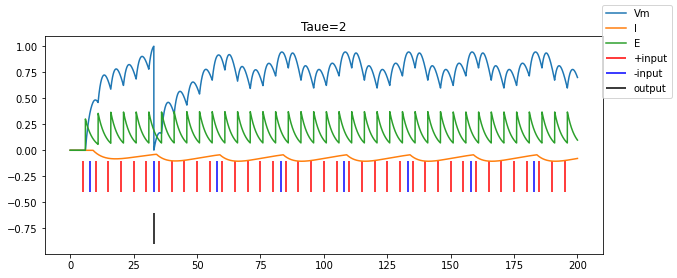

In [19]:
# plot membrane voltage and current
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(time_v,vm4_v,label='Vm')
ax.plot(time_v,im4_v,label='I')
ax.plot(time_v,em4_v,label='E')
ax.vlines(nc4a_v, ymin=-0.4, ymax=-0.1, color='red', label='+input')
ax.vlines(nc4b_v, ymin=-0.4, ymax=-0.1, color='blue', label='-input')
if len(ev4_v) > 0:
    ax.vlines(ev4_v, ymin=-0.9, ymax=-0.6, color='black', label='output')
plt.title('Taue=2')
fig.legend()

In [20]:
# IntFire4 artificial cell

# change taum
if4 = h.IntFire4()
if4.taum = 8 # membrane time constant
if4.taui1 = 8 # inhibitory current time constant 1
if4.taui2 = 10 # inhibitory current time constant 2
if4.taue = 8 # excitatory current time constant


# Stimulators
s4a = h.NetStim()
s4a.interval = 5 # inter-spike interval
s4a.number = 100 # number of spikes
s4a.start = 5 # periodic

s4b = h.NetStim()
s4b.interval = 25 # inter-spike interval
s4b.number = 10 # number of spikes
s4b.start = 8 # periodic

# connect stimulators to IF2 cell
nc4a = h.NetCon(s4a, if4)
nc4a.weight[0] = 0.5 # weight of each event
# store input spike times
nc4a_v = h.Vector()
nc4a.record(nc4a_v)

nc4b = h.NetCon(s4b, if4)
nc4b.weight[0] = -0.5 # weight of each event (negative -> inhibitory)
# store input spike times
nc4b_v = h.Vector()
nc4b.record(nc4b_v)

# store output spike (event) times
ev4 = h.NetCon(if4, None)
ev4_v = h.Vector()
ev4.record(ev4_v)

# record time
time_v = h.Vector()
time_v.record(h._ref_t)


Vector[52]

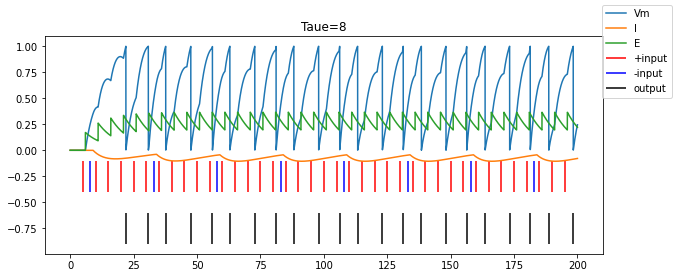

In [21]:
# initialize
h.stdinit()
h.finitialize(-65)

# record M, E and I functions
vm4_v = h.Vector()
im4_v = h.Vector()
em4_v = h.Vector()
vm4_v.append(if4.M())
im4_v.append(if4.I())
em4_v.append(if4.E())

tstop = 200 # final time
nstep = m.ceil(tstop / h.dt) # number of time steps
for i in range(0,nstep):
    h.fadvance() # advance time step
    vm4_v.append(if4.M()) # record M function
    im4_v.append(if4.I()) # record I function
    em4_v.append(if4.E()) # record E function
    
# plot membrane voltage and current
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(time_v,vm4_v,label='Vm')
ax.plot(time_v,im4_v,label='I')
ax.plot(time_v,em4_v,label='E')
ax.vlines(nc4a_v, ymin=-0.4, ymax=-0.1, color='red', label='+input')
ax.vlines(nc4b_v, ymin=-0.4, ymax=-0.1, color='blue', label='-input')
if len(ev4_v) > 0:
    ax.vlines(ev4_v, ymin=-0.9, ymax=-0.6, color='black', label='output')
plt.title('Taue=8')
fig.legend()

Finally, following the same logic, decreasing the excitatory time constant will decrease the number of spikes because it will decrease the excitatory input. However, increasing it will have the opposite effect and will increase the spiking of the neuron.

# Ex4. Experimentation: Point Neuron Network 

<font size='3'>Create a point neuron network with 25 IF neurons with 51% probability that a cell could be excitatory. Assign to your excitatory and inhibitory cell populations different model parameters (taum, taui1, taui2 and taue) of your choice. Make sure to try a few different values that would make the neurons fire nicely. Define random connectivity, stimulation and simulation as is done in tutorial 02. Experiment with the time constants of the inhibitory and excitatory cells to make each population dominate the network in turn. Plot the voltage traces and the raster as your solution and comment on your experimentaiton and observations.  [2 pts]

In [22]:
from neuron import h
import matplotlib.pyplot as plt
import numpy as np

# Load external files & initialize
h.load_file("stdrun.hoc");
soma = h.Section() # dummy section so h._ref_t works

In [23]:
Nneur = 25 # number of neurons in network
pExc = 0.51 # probability of cell being excitatory

#### If inhibitory neurons dominate the network

As seen in the previous exercise, if we want the inhibitory neurons to fire more and the excitatory neurons to fire less, we need to have high inhibitory time constants and low excitatory time constant.

In [24]:
rng = np.random.default_rng()

# create cell population with fixed parameters
cells = []
for i in range(0,Nneur):
    if4 = h.IntFire4()
    if4.taum = 10 # membrane time constant
    if4.taui1 = 12 # inhibitory current time constant 1
    if4.taui2 = 12 # inhibitory current time constant 2
    if4.taue = 5 # excitatory current time constant
    typ = 'Exc' if rng.uniform() < pExc else 'Inh' # sample type
    cells.append({ 'GID': i, 'cell': if4, 'type': typ, 'conns': [], 'spikes': h.Vector(), 'V': None, 'I': None, 'E': None })

NExc = len([x for x in cells if x['type'] == 'Exc'])
NInh = Nneur - NExc
print("Have {} Exc cells and {} Inh cells in network".format(NExc,NInh))

Have 12 Exc cells and 13 Inh cells in network


In [25]:
import itertools

# connect cells with random weights (all-to-all but self)
for src_cell,tgt_cell in itertools.product(cells,cells):
    src = src_cell['cell']
    tgt = tgt_cell['cell']
    if src == tgt:
        dummy = h.NetCon(src, None) # dummy netcon to record events
        dummy.record(src_cell['spikes']) # record spikes
    else:
        w = 0.8 * rng.uniform() # random uniform in [0:0.8)
        w = w if src_cell['type'] == 'Exc' else -w # weight positive (Exc) or negative (Inh)
        nc = h.NetCon(src, tgt) # new netcon between src and tgt
        nc.weight[0] = w # set weight
        nc.delay = rng.integers(5,15) # set delay
        src_cell['conns'].append(nc) # save netcon in source cell

In [26]:
print("Have {} connections in total: E-E = {}; E-I = {}; I-E = {}; I-I = {}".format(
    Nneur*Nneur-Nneur,NExc*NExc-NExc,NExc*NInh,NExc*NInh,NInh*NInh-NInh))

Have 600 connections in total: E-E = 132; E-I = 156; I-E = 156; I-I = 156


In [27]:
# Setup external stimulation (otherwise no activity at all!)
stim = h.NetStim()
stim.start = 5
stim.number = 1000
stim.interval = 10

stimcell = None
for cell in cells:
    if cell['type'] == 'Exc':
        stimcell = cell['cell']
        break
    
stim_nc = h.NetCon(stim, stimcell) # connect to first Exc cell
stim_nc.weight[0] = 0.8
stimvec = h.Vector()
stim_nc.record(stimvec)

0.0

In [28]:
# Setup reporting
tvec = h.Vector()
tvec.record(h._ref_t)

for cell in cells:
    cell['V'] = h.Vector()

In [29]:
# Run simulation (may take a while!)

# initialize
h.stdinit()
h.finitialize(-65)

# store initial value after init
for cell in cells:
    cell['V'].append(cell['cell'].M())

tstop = 200 # final time
nstep = np.int(np.ceil(tstop / h.dt)) # number of time steps
for i in range(0,nstep):
    h.fadvance() # advance time step
    for cell in cells:
        cell['V'].append(cell['cell'].M()) # record M function

/tmp/ipykernel_389/3406029400.py:12: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  nstep = np.int(np.ceil(tstop / h.dt)) # number of time steps


In [30]:
# Collect all spikes
spikes = []
for cell in cells:
    spk = [(t,cell['GID']) for t in cell['spikes']]
    spikes += spk
spikes = np.array(spikes)

print("Have {} spikes in total".format(len(spikes)))

Have 86 spikes in total


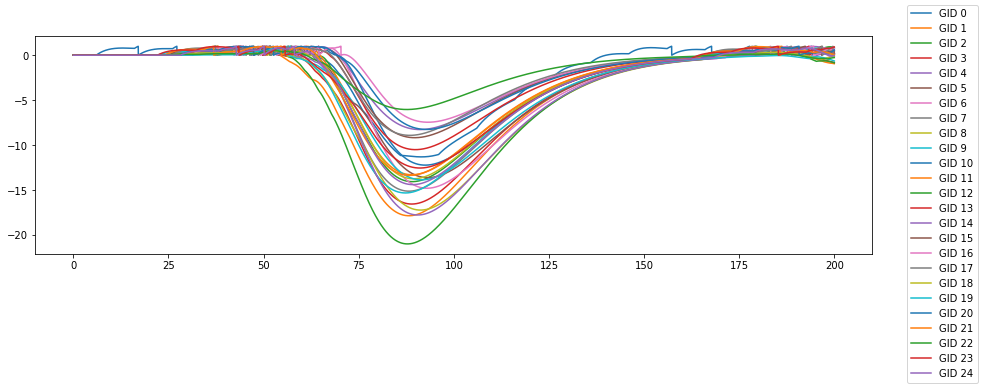

In [31]:
# plot voltage traces
fig, ax = plt.subplots(figsize=(15,4))
for cell in cells:
    ax.plot(tvec,cell['V'],label='GID {}'.format(cell['GID']))
fig.legend()
None

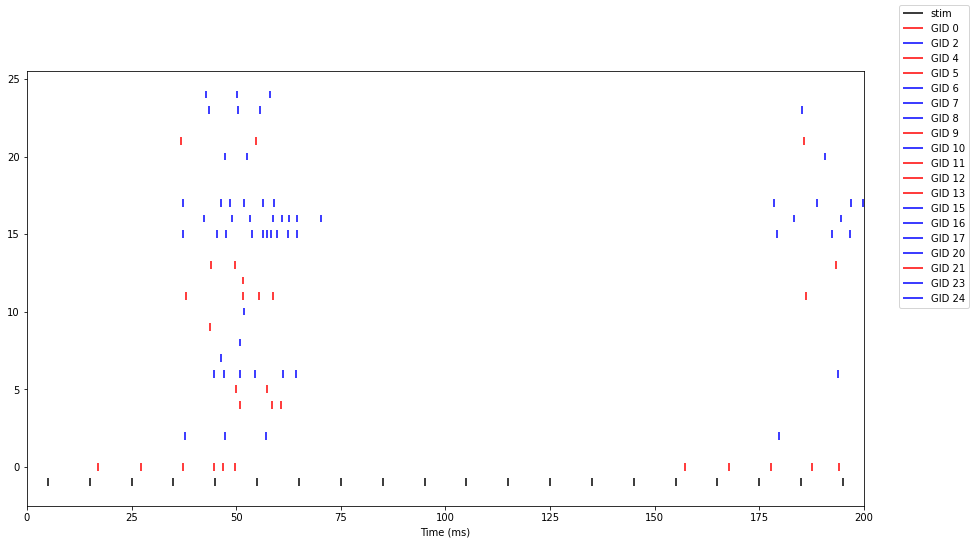

In [32]:
# plot spike raster
fig, ax = plt.subplots(figsize=(15,8))
ax.vlines(stimvec, ymin=-0.75 - 0.5, ymax=-0.25 - 0.5, color='black', label='stim')
for cell in cells:
    c = 'red' if cell['type'] == 'Exc' else 'blue'
    gid = cell['GID']
    ymin = gid + 0.25 - 0.5
    ymax = gid + 0.75 - 0.5
    if len(cell['spikes']) > 0:
        ax.vlines(cell['spikes'], ymin=ymin, ymax=ymax, color=c, label='GID {}'.format(gid))
ax.set_xlim((0,tstop))
ax.set_xlabel('Time (ms)')
fig.legend()
None

#### If excitatory neurons dominate the network

If we want the excitatory neurons to fire more and the inhibitory neurons to fire less, we need to have a low membrane time constant, low inhibitory time constants and high excitatory time constant.

In [33]:
rng = np.random.default_rng()

# create cell population with fixed parameters
cells = []
for i in range(0,Nneur):
    if4 = h.IntFire4()
    if4.taum = 15 # membrane time constant
    if4.taui1 = 5 # inhibitory current time constant 1
    if4.taui2 = 5 # inhibitory current time constant 2
    if4.taue = 15 # excitatory current time constant
    typ = 'Exc' if rng.uniform() < pExc else 'Inh' # sample type
    cells.append({ 'GID': i, 'cell': if4, 'type': typ, 'conns': [], 'spikes': h.Vector(), 'V': None, 'I': None, 'E': None })

NExc = len([x for x in cells if x['type'] == 'Exc'])
NInh = Nneur - NExc
print("Have {} Exc cells and {} Inh cells in network".format(NExc,NInh))

Have 13 Exc cells and 12 Inh cells in network


In [34]:
import itertools

# connect cells with random weights (all-to-all but self)
for src_cell,tgt_cell in itertools.product(cells,cells):
    src = src_cell['cell']
    tgt = tgt_cell['cell']
    if src == tgt:
        dummy = h.NetCon(src, None) # dummy netcon to record events
        dummy.record(src_cell['spikes']) # record spikes
    else:
        w = 0.8 * rng.uniform() # random uniform in [0:0.8)
        w = w if src_cell['type'] == 'Exc' else -w # weight positive (Exc) or negative (Inh)
        nc = h.NetCon(src, tgt) # new netcon between src and tgt
        nc.weight[0] = w # set weight
        nc.delay = rng.integers(5,15) # set delay
        src_cell['conns'].append(nc) # save netcon in source cell

In [35]:
print("Have {} connections in total: E-E = {}; E-I = {}; I-E = {}; I-I = {}".format(
    Nneur*Nneur-Nneur,NExc*NExc-NExc,NExc*NInh,NExc*NInh,NInh*NInh-NInh))

Have 600 connections in total: E-E = 156; E-I = 156; I-E = 156; I-I = 132


In [36]:
# Setup external stimulation (otherwise no activity at all!)
stim = h.NetStim()
stim.start = 5
stim.number = 1000
stim.interval = 10

stimcell = None
for cell in cells:
    if cell['type'] == 'Exc':
        stimcell = cell['cell']
        break
    
stim_nc = h.NetCon(stim, stimcell) # connect to first Exc cell
stim_nc.weight[0] = 0.8
stimvec = h.Vector()
stim_nc.record(stimvec)

0.0

In [37]:
# Setup reporting
tvec = h.Vector()
tvec.record(h._ref_t)

for cell in cells:
    cell['V'] = h.Vector()

In [ ]:
# Run simulation (may take a while!)

# initialize
h.stdinit()
h.finitialize(-65)

# store initial value after init
for cell in cells:
    cell['V'].append(cell['cell'].M())

tstop = 200 # final time
nstep = np.int(np.ceil(tstop / h.dt)) # number of time steps
for i in range(0,nstep):
    h.fadvance() # advance time step
    for cell in cells:
        cell['V'].append(cell['cell'].M()) # record M function

/tmp/ipykernel_389/3406029400.py:12: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  nstep = np.int(np.ceil(tstop / h.dt)) # number of time steps


In [ ]:
# Collect all spikes
spikes = []
for cell in cells:
    spk = [(t,cell['GID']) for t in cell['spikes']]
    spikes += spk
spikes = np.array(spikes)

print("Have {} spikes in total".format(len(spikes)))

In [ ]:
# plot voltage traces
fig, ax = plt.subplots(figsize=(15,4))
for cell in cells:
    ax.plot(tvec,cell['V'],label='GID {}'.format(cell['GID']))
fig.legend()
None

In [ ]:
# plot spike raster
fig, ax = plt.subplots(figsize=(15,8))
ax.vlines(stimvec, ymin=-0.75 - 0.5, ymax=-0.25 - 0.5, color='black', label='stim')
for cell in cells:
    c = 'red' if cell['type'] == 'Exc' else 'blue'
    gid = cell['GID']
    ymin = gid + 0.25 - 0.5
    ymax = gid + 0.75 - 0.5
    if len(cell['spikes']) > 0:
        ax.vlines(cell['spikes'], ymin=ymin, ymax=ymax, color=c, label='GID {}'.format(gid))
ax.set_xlim((0,tstop))
ax.set_xlabel('Time (ms)')
fig.legend()
None